## Implement a classification/logistic regression problem. For example, based on different features of students data, classify, whether a student is suitable for a particular activity. Based on the available dataset, a student can also implement another classification problem like checking whether an email is spam or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
data = pd.read_csv('ex2data1.txt', header = None, names = ['Exam1', 'Exam2', 'Acceptance'])
data

,Exam1,Exam2,Acceptance
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [3]:
data.insert(0, "Ones", 1)
data

,Ones,Exam1,Exam2,Acceptance
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
...,...,...,...,...
95,1,83.489163,48.380286,1
96,1,42.261701,87.103851,1
97,1,99.315009,68.775409,1
98,1,55.340018,64.931938,1


In [4]:
cols = data.shape[1]

In [5]:
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

In [6]:
positive = data[data['Acceptance'].isin([1])]
negative = data[data['Acceptance'].isin([0])]

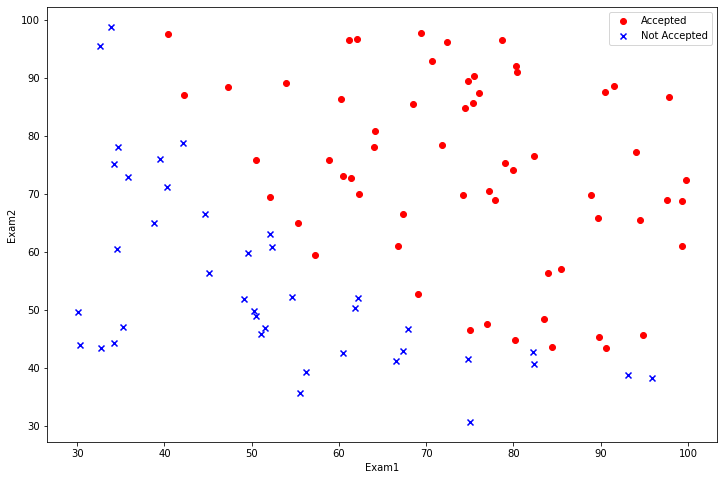

In [7]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], c = 'r', marker = 'o', label = 'Accepted')
ax.scatter(negative['Exam1'], negative['Exam2'], c = 'b', marker = 'x', label = 'Not Accepted')
ax.set_xlabel("Exam1")
ax.set_ylabel("Exam2")
ax.legend()

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def costFunction(theta, X, y):    
    final = (-1) / len(X) * ((np.log(sigmoid(X.dot(theta))).T).dot(y) +
                             (np.log(1 - (sigmoid(X.dot(theta)))).T).dot(1 - y))
    return final[0]

In [10]:
theta = np.array([0, 0, 0])

In [11]:
def gradient(theta, X, y):
    theta = np.reshape(theta, (theta.size, 1))
    pred = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, pred - y) / len(X)
    # grad[1:] = grad[1:] + lambda * theta[1:] / m
    return grad.flatten()

In [12]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
theta = np.array([0, 0, 0])

In [14]:
theta.shape

(3,)

In [15]:
result = opt.fmin_tnc(func = costFunction, x0 = theta, fprime = gradient, args = [X, y])
weights = result[0]
weights

array([-25.16131865,   0.20623159,   0.20147149])

In [16]:
costFunction(result[0], X, y)

0.20349770158947447

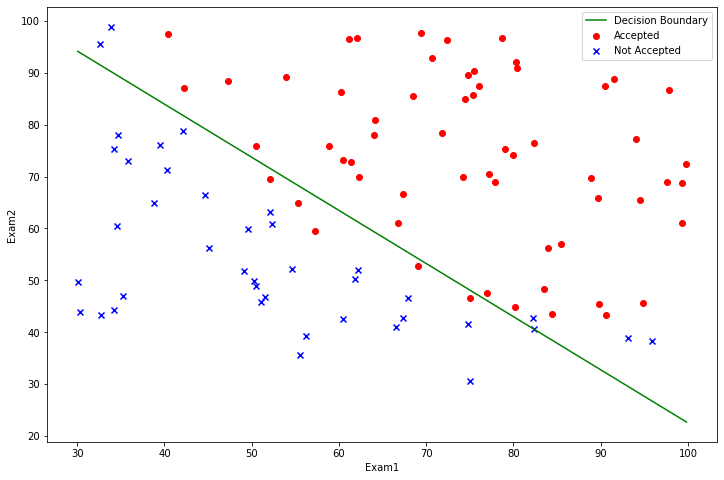

In [17]:
x = np.linspace(data.Exam1.min(), data.Exam1.max(), 100)
y = -(weights[0] + weights[1] * x) / weights[2]
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(x, y, c = 'g', label = "Decision Boundary")
ax.scatter(positive['Exam1'], positive['Exam2'], c = 'r', marker = 'o', label = 'Accepted')
ax.scatter(negative['Exam1'], negative['Exam2'], c = 'b', marker = 'x', label = 'Not Accepted')
ax.set_xlabel("Exam1")
ax.set_ylabel("Exam2")
ax.legend()